# Deep Learning Word2Vec Assignment

Part 1: Semantic Analysis with Word2Vec
1. Word Embeddings Generation:

• Use the Gensim library to train a Word2Vec model on a dataset (Shakespeare dataset or another corpus
of your choice).

• Generate word embeddings for the vocabulary of the corpus.
2. Semantic Similarity:

• Implement a function to find the k most similar words to a given word based on the trained Word2Vec
embeddings.

• Test the function with several words, including both common and unusual words from the corpus.

3. Word Analogy Task:

• Create a function that solves word analogies using the embeddings. The function should take three words
as input: word1, word2, word3, and predict a word4 such that word1 is to word2 as word3 is to word4.

• Test this function with at least 5 different word sets.

In [26]:
#!pip install gensim numpy nltk

In [27]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

In [28]:
# Download NLTK data for tokenization
nltk.download('punkt')

# Load the Shakespeare dataset or any other corpus
corpus_path = 'Shakespeare.txt'
with open(corpus_path, 'r', encoding='utf-8') as file:
    corpus = file.read()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# Tokenize the corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in nltk.sent_tokenize(corpus)]

In [30]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=5)

In [31]:
# Function to find k most similar words
def find_similar_words(word, k=5):
    similar_words = model.wv.most_similar(word, topn=k)
    return similar_words

In [32]:
# Test similarity function
print("Similar words to 'queen':", find_similar_words('queen'))


Similar words to 'queen': [('prince', 0.901370108127594), ('duke', 0.8673526644706726), ('governor', 0.8593849539756775), ('page', 0.8455472588539124), ('york', 0.8378102779388428)]


In [33]:
# Test similarity function
print("Similar words to 'love':", find_similar_words('love'))

Similar words to 'love': [('honour', 0.8075200319290161), ('pity', 0.7921184301376343), ('heart', 0.7879105806350708), ('mind', 0.7794352173805237), ('fear', 0.7775632739067078)]


In [34]:
# Test similarity function
print("Similar words to 'sad':", find_similar_words('sad'))

Similar words to 'sad': [('angry', 0.8999916911125183), ('disposed', 0.8781449794769287), ('horribly', 0.8700206279754639), ('pitiful', 0.8677997589111328), ('blest', 0.8667511343955994)]


In [35]:
# Test similarity function
print("Similar words to 'own':", find_similar_words('own'))

Similar words to 'own': [('honour', 0.8248804807662964), ('ears', 0.7746052742004395), ('eyes', 0.7658484578132629), ('tears', 0.7652004361152649), ('eye', 0.7514035105705261)]


In [36]:
# Test similarity function
print("Similar words to 'misuse':", find_similar_words('misuse'))

Similar words to 'misuse': [('flattering', 0.9139246344566345), ('affectation', 0.9130411744117737), ('outcast', 0.911979615688324), ('normans', 0.9110307693481445), ('smells', 0.9106159210205078)]


In [37]:
# Test similarity function
print("Similar words to 'jester':", find_similar_words('jester'))

Similar words to 'jester': [('respecting', 0.7383424639701843), ('stoics', 0.7375606298446655), ('bigger', 0.7360274195671082), ('matter', 0.7339342832565308), ('count', 0.7294655442237854)]


In [38]:
# Function for word analogy task
def word_analogy_task(word1, word2, word3, k=1):
    try:
        word4 = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=k)[0][0]
        return word4
    except KeyError:
        return f"Words not in vocabulary: {word1}, {word2}, {word3}"

In [39]:
# Test word analogy function
word_sets = [('sun', 'day', 'moon', 2),
             ('fish', 'water', 'bird', 2),
              ('cat', 'kitten', 'dog', 2),
            ('happy', 'happier', 'sad', 2),
              ('book', 'author', 'song', 2),
             ('king', 'queen', 'man', 2),
             ('paris', 'france', 'london', 2),
             ('good', 'better', 'bad', 2)]

for word_set in word_sets:
    word1, word2, word3, k = word_set
    predicted_word = word_analogy_task(word1, word2, word3, k)
    print(f"{word1} : {word2} :: {word3} : {predicted_word}")

sun : day :: moon : night
fish : water :: bird : channel
cat : kitten :: dog : nightingale
happy : happier :: sad : stirs
book : author :: song : friar
king : queen :: man : woman
paris : france :: london : frogmore
good : better :: bad : greater


In [40]:
# Save the Word2Vec model
model.save("word2vec_model")

Part 3: Visualization (Optional)

• Use PCA or t-SNE to visualize the high-dimensional word embeddings in two dimensions.

• Plot the embeddings for a select set of words and their closest neighbors.

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


In [42]:
# Visualize word embeddings using PCA
def plot_embeddings(words, embeddings, title):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', edgecolors='k')
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(title)
    plt.show()

In [43]:
# Select a set of words for visualization
visualization_words = ['love', 'king', 'queen', 'sword', 'forest', 'ship', 'war', 'peace','hate','feet','friend','broil','lord',
                       'land','holy','nail','scot','blood','dead','bold','heat','horse','good','grace']

In [44]:
# Get embeddings for visualization words
embeddings = [model.wv[word] for word in visualization_words]

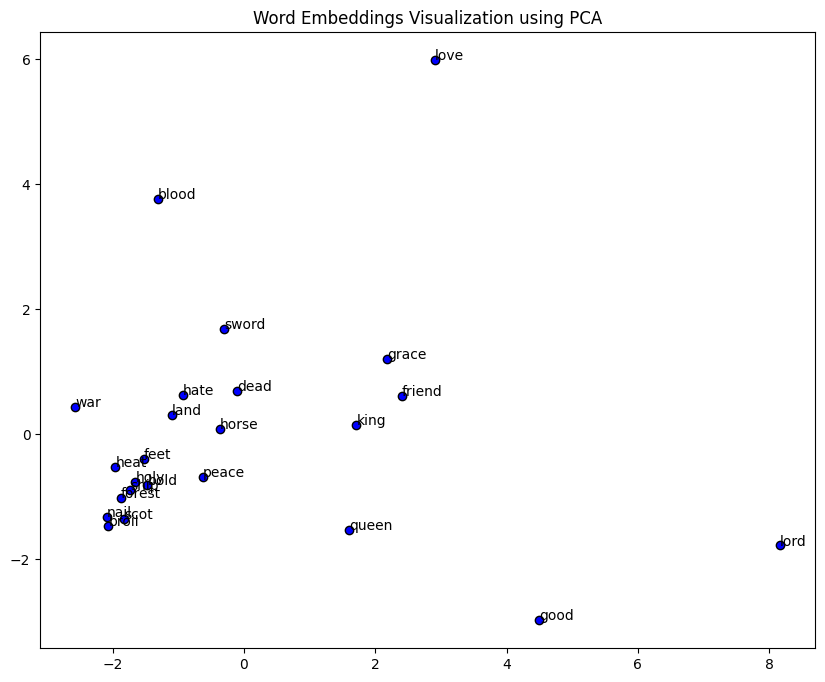

In [45]:
# Plot the embeddings using PCA
plot_embeddings(visualization_words, embeddings, 'Word Embeddings Visualization using PCA')
